In [29]:
import networkx as nx
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import os
# Potency of messaging levels for red team agent (1-5) 
# 1 = low potency
# 5 = high potency
last_choice = 0
blue_energy = 100
grey_used = 0
red_followers = 0
MINIMUM_UNCERTAINTY = -1
MAXIMUM_UNCERTAINTY = 1


In [26]:
def networkanalysis():
    """
    This function reads the network-2.csv  and creates a dictionary.
    In each line, if it's 1,2 add 2 to 1's neighbors and 1 to 2's neighbors
    """
    list_edges = []
    with open("network-2.csv") as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        for row in lines[1:]:
            row = row.split(",")
            list_edges.append((int(row[0]), int(row[1])))
    
    return list_edges
    #create a copy of graph and add edges from list_edges
    # print(list_edges)
    # G = nx.DiGraph()
    # G.add_edges_from(list_edges)
    # nx.draw(G)
    # plt.show()


In [27]:
def read_network():
    """
    This Function reads the node-attributes.txt file and creates a graph based on the attributes, assigning ID to each node and also the node's team.
    """
    G = nx.Graph()
    with open("node-attributes.txt") as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]
        for row in lines[1:]:
            row = row.split(",")
            G.add_node(int(row[0]), team=row[1])
    # print(G.nodes(data=True))
    return seperate_teams(G)


def seperate_teams(graph):
    """
    This function takes the initial graph and return three separate graphs for each team 
    i.e. Green, Blue, Red and Grey (if grey it also includes if they are good or bad)
    """   
    green_team = nx.Graph()
    red_team = nx.Graph()
    blue_team = nx.Graph()
    grey_team = nx.Graph()
    for node in graph.nodes(data=True):
        if node[1]['team'] == 'green':
            green_team.add_node(node[0], team=node[1]['team'])
        elif node[1]['team'] == 'red':
            red_team.add_node(node[0], team=node[1]['team'])
        elif node[1]['team'] == 'blue':
            blue_team.add_node(node[0], team=node[1]['team'])
        elif node[1]['team'].split("-")[0] == 'grey':
            grey_team.add_node(node[0], team=node[1]['team'])

    return green_team, red_team, blue_team, grey_team

def initialize_green_team(green_team):
    """
    This function takes the green team, creates a new graph with the same nodes and assigns a random opinion(X) to each node and random uncertainty(U) to each node
    in the range [-1,1] 
    x : 1 or 0, 1 = pro-voting, 0 = anti-voting
    """
    new_green_team = nx.Graph()
    for node in green_team.nodes(data=True):
        new_green_team.add_node(node[0], X = random.randint(0,1), U = round(random.uniform(-1,1),1), F = 1)
        
    return new_green_team

def visualize_graph(graph): 
    """
    This function takes a graph and visualizes it
    """
    new_graph = nx.Graph()
    blue_count = 0
    red_count = 0
    for node in graph.nodes(data=True):
        color = ""
        if node[1]['X'] == 1:
            color = "blue"
            blue_count += 1
        else:
            color = "red"
            red_count += 1
        new_graph.add_node(node[0], color = color)
    
    #Visualize the graph with the X values as the node color, show the edges and the node labels
    nx.draw(new_graph, node_color = [node[1]['color'] for node in new_graph.nodes(data=True)], with_labels = True)
    #label the graph with the number of blue and red nodes
    plt.title("Blue: " + str(blue_count) + " Red: " + str(red_count))
    
    plt.show()


Welcome to the game
Initialising the green team assigning random opinions and uncertainty
Beep Boop
Green Team is: 
Total Green Nodes:  25
Red Followers are: 
25


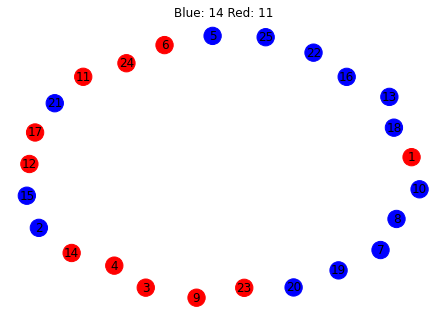

In [28]:
  
def main():
    """
    Main function that runs the simulation
    """
   
    print("Welcome to the game")
    
    # print("Current Graph is: ")
    
    green_team, red_agent, blue_agent , grey_team= read_network()
    
    print("Initialising the green team assigning random opinions and uncertainty")
   
    print("Beep Boop")
   
    print("Green Team is: ")
   
    green_team = initialize_green_team(green_team)
    
    set_red_followers(green_team)
    print("Total Green Nodes: ", green_team.number_of_nodes())
    print("Red Followers are: ")
    print(red_followers)
    
    visualize_graph(green_team)
    
    start_game(green_team)
    
main()

In [18]:
def set_red_followers(green_team):
    """_summary_: This function takes the green team and assigns the number of followers from the green team
    """
    global red_followers
   # Calculate the number of followers for the red agent
    for node in green_team.nodes(data=True):
        if node[1]['F'] == 1:
            red_followers += 1

            

In [13]:
def check_game_status():
    """
    This function checks the status of the game and returns the status of the game
    """
    if red_followers <= 0:
        print("Red agent has lost all their followers")
        return 1
    if blue_energy <= 0:
        print( "Blue agent has no more energy")
        return 0
    else:
        return -1
    
def end_game(status):
    """
    This function takes the status of the game and prints the winner
    """
    if status == 1:
        print("Blue agent wins")
    else:
        print("Red agent wins")
    
    blue_count, red_count = count_nodes(green_team)
    print("People Who Want To Vote (Blue Team Score): ", blue_count)
    print("People Who Are Against Voting (Red Team Score): ", red_count)
    print("Thank you for playing")
    print("This game was made by: Anurag Yadav ")
    exit()
    
    
def count_nodes(green_team):
    """
    This function takes the green team and counts the number of green nodes with either X = 1 or X = 0
    """
    blue_count = 0
    red_count = 0
    for node in green_team.nodes(data=True):
        if node[1]['X'] == 1:
            blue_count += 1
        else:
            red_count += 1
    return blue_count, red_count

In [30]:
def start_game(green_team):
    #check if the game is over
    Turns = 0
    
    #if the game is not over, then start the game
    print("Starting the game")
    print("Beep Boop")
    #clear the screen
    os.system('cls')
    print("At the start of the game, All the green nodes can be either pro-voting or anti-voting")
    print("Each Turn, the red agent will try to convince the green nodes to be anti-voting")
    print("And the blue agent will try to convince the green nodes to be pro-voting")
    print("The red agent will have a certain number of followers and the blue agent will have a certain amount of energy")
    print("The red agent loses followers if they are too persuasive and the blue agent loses energy if they are too persuasive")
    print("At the end of the game, the team with the most number of people supporting certain ideolgy wins")
    print("Lets start the game")
    os.system('cls')
    print("Choose Game Mode")
    print ("1. Single Player")
    print ("2. Multiplayer")
    print ("3. Human vs AI")
    print ("4. AI vs AI")
    print ("5. Exit")
    choice = int(input())
    if choice >=1 and choice <= 4:
        game_mode = choice
    else:
        print("Invalid Choice")
        print("Exiting the game")
        exit()
    os.system("cls")
    if game_mode == 2:
        print("Multiplayer")
        toss = ("PLayer 1, choose heads or tails (H/T").lower() 
        if not toss == "h" or not toss == "t":
            print("Invalid input")
        #generate a random number between 0 and 1
        random_number = random.randint(0,1)
        if random_number == 0:
            random_number = "h"
        else:
            random_number = "t"
        Player1 = ""
        Player2 = ""
        if toss == random_number:
            print("Player 1 wins the toss")
            print("Player 1, choose your agent")
            choice = input("1. Red Agent (Anti-Voting) OR 2. Blue Agent (Pro-Voting)")
            if choice == 1:
                print("Player 1 is Red Agent")
                print("Player 2 is Blue Agent")
                Player1 = "Red"
                Player2 = "Blue"
            else:
                print("Player 1 is Blue Agent")
                print("Player 2 is Red Agent")
                Player1 = "Blue"
                Player2 = "Red"
            print("Game is starting")
            
        
        while(Turns<10):
            r_f = red_followers
            b_e = blue_energy
            status = check_game_status()
            if status != -1:
                print("Game Over")
                end_game(status)
    
            Turns += 1
            if Player1 == "Red":
                red_turn(green_team)
                visualize_graph(green_team)
                os.system("cls")
                green_interaction(green_team)
                os.system("cls")
                blue_turn(green_team)
                visualize_graph(green_team)
                os.system("cls")
                
            if Player1 == "Blue":
                blue_turn(green_team)
                visualize_graph(green_team)
                os.system("cls")
                green_interaction(green_team)
                os.system("cls")
                red_turn(green_team)
                visualize_graph(green_team)
                os.system("cls")
                
            print("After Turn ", Turns)
            blue_count, red_count = count_nodes(green_team)
            print("People Who Want To Vote (Blue Team Score): ", blue_count)
            print("People Who Are Against Voting (Red Team Score): ", red_count)
            
            print("Red Followers: ", red_followers)
            print("Lost Followers: ", r_f - red_followers)
            print("Blue Energy: ", blue_energy)
            print("Lost Energy: ", b_e - blue_energy)
            
            print("Press Enter to Continue")
            input()
            os.system("cls")

    
            
            
            
            
        
                
    

In [ ]:
def green_interaction(green_graph):
    """
    A node's intent to vote can be determined by the X value, if X = 1, then the node is pro-voting, if X = 0, then the node is anti-voting.
    This function simulates the green-to-green interaction, where each node interacts with its neighbours and updates its opinion and uncertainty.
    For e.g. for two nodes A and B, if U(A) > U(B), it changes its opinion to that of A and uncertainity is calculated using the function.
    
    Important: 
    Rules:
        1. If both the nodes have same opinion, the X remains same but the U changes, U = U1 + U2/2.
        2. If both the nodes dont have the same opinion, the X changes to the opinion of the node with higher U and the U is calculated using the function.
    """
    
    networkability = networkanalysis()
    
    for edge in networkability:
        first_node = edge[0]
        second_node = edge[1]
        
        # First Case : Compare their Opinion.
        if green_graph.nodes[first_node]['X'] == green_graph.nodes[second_node]['X']:
            #In this case, the opinion remains the same but the uncertainty changes and 
            #they become more certain about their opinion
            green_graph.nodes[first_node]['U'] = (green_graph.nodes[first_node]['U'] - green_graph.nodes[second_node]['U'])/2
            green_graph.nodes[second_node]['U'] = (green_graph.nodes[first_node]['U'] - green_graph.nodes[second_node]['U'])/2
            
        # Second Case : Compare their Uncertainty
        elif green_graph.nodes[first_node]['U'] < green_graph.nodes[second_node]['U']:
            #In this case, the opinion of the first node is taken and the uncertainty is calculated using the function
            green_graph.nodes[second_node]['X'] = green_graph.nodes[first_node]['X']
            green_graph.nodes[second_node]['U'] = calculate_uncertainty(green_graph.nodes[first_node]['U'], green_graph.nodes[second_node]['U'])

        elif green_graph.nodes[first_node]['U'] > green_graph.nodes[second_node]['U']:
            #In this case, the opinion of the second node is taken and the uncertainty is calculated using the function
            green_graph.nodes[first_node]['X'] = green_graph.nodes[second_node]['X']
            green_graph.nodes[first_node]['U'] = calculate_uncertainty(green_graph.nodes[second_node]['U'], green_graph.nodes[first_node]['U'])
        
    return green_graph


def calculate_uncertainty(U1, U2):
    """
    This function calculates the uncertainty of a node based on the uncertainty of the other node.
    """
    return (U1 - U2)/2

def assigning_agents(r_agent,b_agent):
    """
    This function initializes the red and blue agents with their respective opinions and uncertainty.
    
    U(R) = -1 and U(B) = -1
    X(R) = 0 and X(B) = 1 
    """
    for node in r_agent.nodes(data=True):
        r_agent.nodes[node[0]]['X'] = 0
        r_agent.nodes[node[0]]['U'] = -1
        
    for node in b_agent.nodes(data=True):
        b_agent.nodes[node[0]]['X'] = 1
        b_agent.nodes[node[0]]['U'] = -1
        
    return r_agent, b_agent


# Interactions

In [ ]:
def red_turn(green_team):
    global last_choice
    misinformation = [
    "1. The voting process is rigged, it's already decided who will win. (Potency = 5)\n",
    "2. Voting for a democratic election is a waste of time.  (Potency = 4)\n",
    "3. The voting process is not transparent, the results are not reliable.  (Potency = 3)\n",
    "4. The voting process is not secure, it can be hacked. (Potency = 2)\n"  ,
    "5. The voting process is not safe, it can be attacked.  (Potency = 2)\n",
    "6. The voting process is not fair, it is biased. (Potency = 2)\n"    ,
    "7. The voting process is not democratic, it is not inclusive.  (Potency = 3)\n",
    "8. The voting process is not reliable, it is not accurate.  (Potency = 2)\n",
    "9. The voting process is not trustworthy, it is not honest. (Potency = 3) \n",
    "10. The voting process is not effective, it is not efficient. (Potency = 2) \n"
    ]
    potencies = [5,4,3,2,2,2,3,2,3,2]
    #print misinformation messages and give the user a choice to select one of them
    print("Red's Turn")
    print("Choose One of the following Misinformation Messages to spread, by entering the number [Potency affects the your followers' opinion]")
    for i in range(len(misinformation)):
        if last_choice != 0:
            if i+1 == last_choice:
                print("RECOMMENDED: ", misinformation[i])
        else:
            print(misinformation[i])
    choice = int(input("Enter your choice: "))
    print("You have chosen: ", misinformation[choice-1])
    
    last_choice = choice    
      
    potency = potencies[choice-1]
    
    print("Potency of the message is: ", potency)
    
    print("Red Agent is sending a message to the Green Team")
    
    for node in green_team.nodes(data=True):
        #check if the node is a follower or not
        if not green_team.nodes[node[0]]['F'] == 0:
            #call red_interaction function
            x, u, f = red_interaction(green_team.nodes[node[0]]['X'], green_team.nodes[node[0]]['U'], potency, green_team.nodes[node[0]]['F'])
            green_team.nodes[node[0]]['X'] = x
            green_team.nodes[node[0]]['U'] = u
            green_team.nodes[node[0]]['F'] = f
    
    print("Red Agent has sent the message to the Green Team")
    print("Turn is over")
    return green_team
            

def red_interaction(opinion, uncertainty, potency, follower):
 
    if opinion == 1:
        if uncertainty <= -0.5:
            if potency > 3:
                follower = 0
            else:
                uncertainty = uncertainty + potency/10
                 
        elif uncertainty >= -0.5 and uncertainty < 0:
            if potency > 3:
                follower = 1
            else:
                uncertainty = uncertainty + potency/10
        elif uncertainty >= 0 and uncertainty < 0.5:
            if potency > 3:
                opinion = 0
                uncertainty = uncertainty - potency/10 * 1.5
            if potency < 3:
                uncertainty = uncertainty + potency/10 
        elif uncertainty >= 0.5:
            if potency > 3:
                opinion = 0
                uncertainty = -uncertainty
        else:
            uncertainty = uncertainty - potency/10
        
        
    elif opinion == 0:
        uncertainty = uncertainty - potency/10
        
    return opinion, uncertainty, follower


        

In [ ]:
def blue_turn(green_team):
    global last_choice
    global blue_energy
    global blue_energy_used
    correction = [
    "1. The voting process is transparent, the results are reliable. (Potency = 5)\n",
    "2. The voting process is secure, it cannot be hacked.  (Potency = 4)\n",
    "3. The voting process is safe, it cannot be attacked.  (Potency = 3)\n",
    "4. The voting process is fair, it is not biased. (Potency = 2)\n"  ,
    "5. The voting process is democratic, it is inclusive.  (Potency = 2)\n",
    "6. The voting process is reliable, it is accurate. (Potency = 2)\n"    ,
    "7. The voting process is trustworthy, it is honest.  (Potency = 3)\n",
    "8. The voting process is effective, it is efficient.  (Potency = 2)\n",
    "9. The voting process is not rigged, it is not decided who will win. (Potency = 3) \n",
    "10. Voting for a democratic election is not a waste of time. (Potency = 2) \n"
    ]
    
    print("Blue's Turn")
    print("Choose One of the following Correction Messages to spread, by entering the number [Potency affects your energy]")
    print("Current Energy: ", blue_energy)
    
    for i in range(len(correction)):
        if last_choice != 0:
            if i+1 == last_choice:
                print("RECOMMENDED: ", correction[i])
        else:
            print(correction[i])
    choice = int(input("Enter your choice: "))
    print("You have chosen: ", correction[choice-1])
    
    last_choice = choice

    potencies = [5,4,3,2,2,2,3,2,3,2]
    
    potency = potencies[choice-1]
    
    print("Potency of the message is: ", potency)

    if grey_used < 3:
        print ("Do you want to use a grey agent to spread the message? [Y/N] Max : 3, Uses Left = ", 3-grey_used)
        grey = input("Enter your choice: (Y/N")
        #Convert to lowercase
        grey = grey.lower()
    if grey == 'y':
        grey_agent = True
        print("Grey Agent is sending a message to the Green Team, No Energy is used")
        for node in green_team.nodes(data=True):
            #call blue_interaction function
            x, u, f = blue_interaction(green_team.nodes[node[0]]['X'], green_team.nodes[node[0]]['U'], potency,grey_agent)
            green_team.nodes[node[0]]['X'] = x
            green_team.nodes[node[0]]['U'] = u
        print("Grey Agent has sent the message to the Green Team")
        
    else:
        print("Blue Agent is sending a message to the Green Team")
        max_loss = 12
        current_used_energy = 0
        #check if grey_agent is spy or not
        

        for node in green_team.nodes(data=True):
            x, u, energy = blue_interaction(green_team.nodes[node[0]]['X'], green_team.nodes[node[0]]['U'], potency, grey_agent)
            green_team.nodes[node[0]]['X'] = x
            green_team.nodes[node[0]]['U'] = u
            current_used_energy += energy/len(green_team.nodes(data=True))
        print("Blue Agent has sent the message to the Green Team")
        if current_used_energy > max_loss:
            blue_energy = blue_energy - max_loss
        else:
            blue_energy = blue_energy - current_used_energy
        
        print("Current Energy: ", blue_energy)
    
    print("Turn is over")
    return green_team
        
def blue_interaction(opinion, uncertainty, potency, grey_agent):
    energy = 0
    new_uncertainty = uncertainty
    if opinion == 1:
            if uncertainty - potency/10 < MINIMUM_UNCERTAINTY:
                new_uncertainty = MINIMUM_UNCERTAINTY
            else:
                new_uncertainty = uncertainty - potency/10
            if grey_agent != True:
                if uncertainty < 0:
                    energy = potency - (uncertainty) * 1.5
                else:
                    energy = potency * 1.5

    elif opinion == 0:
        if uncertainty <=-0.5:
            if potency > 3:
                new_uncertainty = uncertainty + 1.12*potency/10
            else :
                new_uncertainty = uncertainty + potency/10 
         
        elif uncertainty >= -0.5 and uncertainty < 0:
            if potency > 3:
                new_uncertainty = uncertainty + 1.34*potency/10
            else:
                new_uncertainty = uncertainty + potency/10
        elif uncertainty >= 0 and uncertainty < 0.5:
            if potency > 3:
                new_uncertainty = uncertainty + 1.56*potency/10
            else:
                new_uncertainty = uncertainty + potency/10
        elif uncertainty > 0.5:
            if potency > 3:
                new_uncertainty = uncertainty - 2*potency/10
                opinion = 1
            else:
                if uncertainty + potency/10 > MAXIMUM_UNCERTAINTY:
                    new_uncertainty = MAXIMUM_UNCERTAINTY
                else:
                    new_uncertainty = uncertainty + potency/10
                    
        if grey_agent != True:
            energy = potency+uncertainty * 1.5
    return opinion, uncertainty, energy
        

# Minimax


In [ ]:
def minimax(agent, green_team):
    

In [ ]:
#set uncertainty threshold  
